# Задача: Идентификация видов стекла.


Часто на месте преступления остаются осколки разных видов стекол, которые можно использовать как улики, если определить тип стекла и от каких оно объектов. Выборка состоит из 9 признаков - химических параметров образцов и 214 объектов. Необходимо каждому образцу сопоставить один из 6 классов (например: стекло автомобиля, осколок посуды, окно здания) и сравнить качество работы решающего дерева и алгоритма решающего дерева и алгоритма k-ближайших соседей. В качестве функции ошибки использовать долю неправильных ответов классификатора. Дает ли масштабирование признаков значительное улучшение в качестве классификации?

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from sklearn import cross_validation, neighbors, metrics, tree, model_selection
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
columnNames = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glassData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names = columnNames, header=None)
glassData.head(3)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


На диаграммах ниже можно заметить, что стекло от фар(7)  можно с большой точностью идентефицировать среди предоставленных объектов.

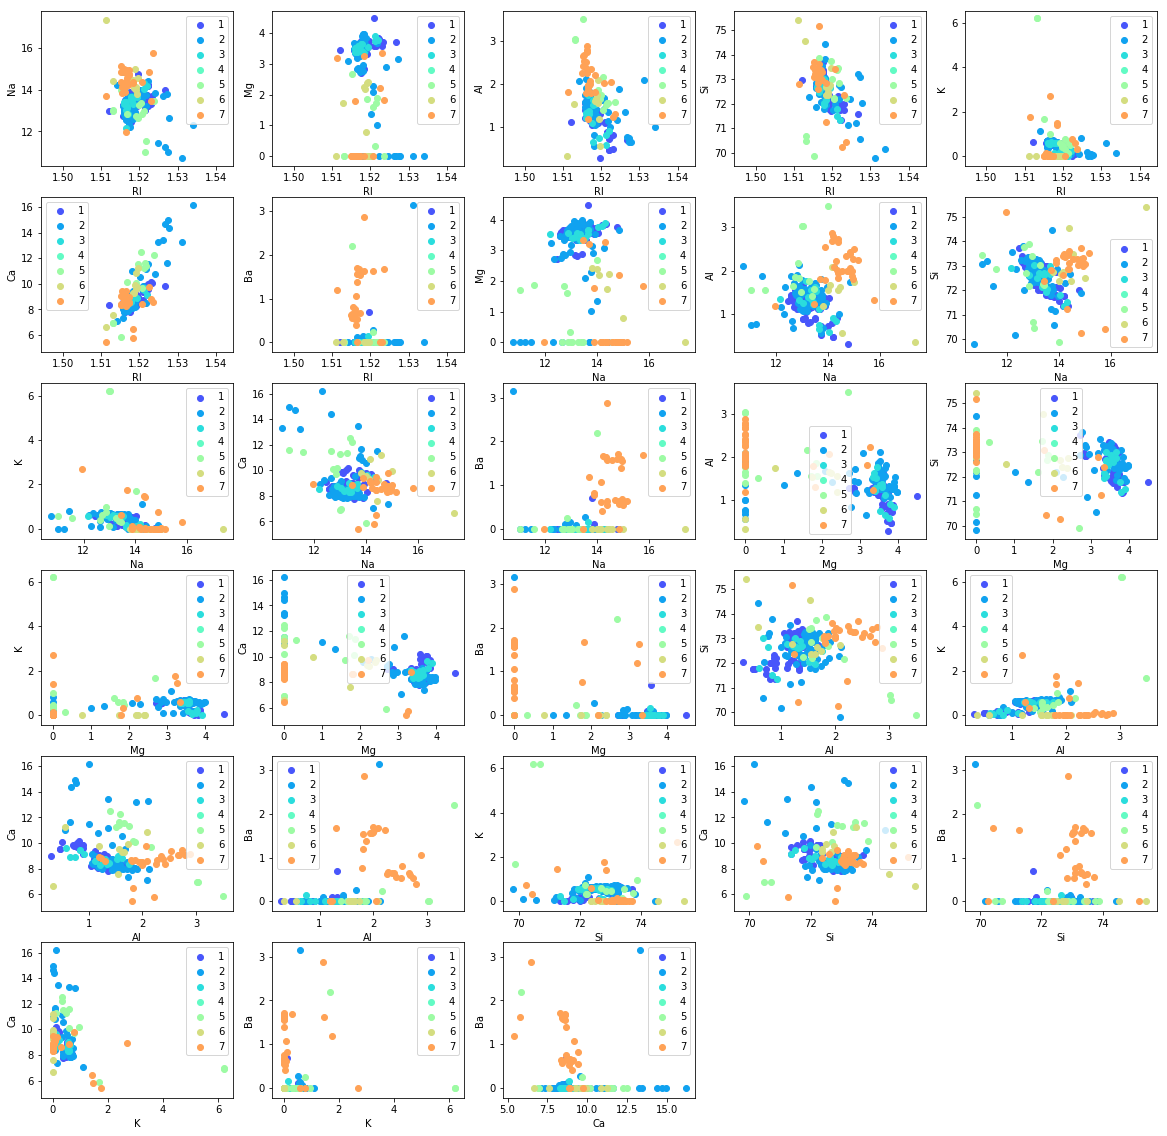

In [217]:
glassFeaturesData = glassData.drop(['Id'], axis=1)
figure = plt.figure(figsize=(20,20))

k = 1
for i in range(len(glassFeaturesData.columns)-1):
    for j in range(i+1,len(glassFeaturesData.columns)-2):
        subplot = figure.add_subplot(6,5, k)
        k = k+1
        xColumn = glassFeaturesData.columns[i]
        yColumn = glassFeaturesData.columns[j]
        
        colors = cm.rainbow(np.linspace(0, 1, 10))
        
        for n in range(1,8):
            subplot.scatter(glassData[glassData.Type == n][xColumn], glassData[glassData.Type == n][yColumn], color=colors[n], label=n)        
            
        plt.xlabel(xColumn)
        plt.ylabel(yColumn)
        plt.legend()

            
        

Исходные данные:

In [177]:
X = glassFeaturesData.drop(['Type'], axis=1)
Y = glassFeaturesData['Type']



Отмасштабируем исходные данные.

In [189]:
scaler = StandardScaler()
scaler.fit(X, Y)
X_Scalled = scaler.transform(X)

# Алгоритм: k-ближайших соседей

Минимальная ошибка без масштабирования:0.36784947838224025, При 14 соседях.
Минимальная ошибка с масштабированием:0.3371068557841369, При 3 соседях.


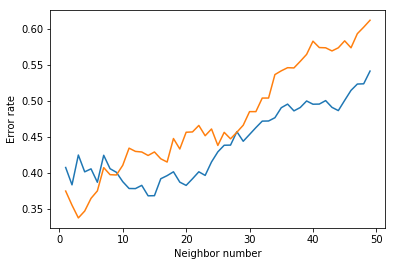

In [212]:
def testKNeighbors(X,Y):
    errorsNeighboor = []
    for i in range(1,50):
        neighbor = neighbors.KNeighborsClassifier(n_neighbors=i) 
        c_v_s = model_selection.cross_val_score(neighbor, X, Y, cv = 3)
        errorsNeighboor.append(1 - c_v_s.mean())
    return errorsNeighboor

errorsNeighbor = testKNeighbors(X,Y)
errorsNeighborOnScalled = testKNeighbors(X_Scalled, Y)

nNeighbor = np.arange(1,50)
plt.plot(nNeighbor, errorsNeighboor, nNeighbor, errorsNeighborOnScalled)

plt.ylabel("Error rate")
plt.xlabel("Neighbor number")

print(f"Минимальная ошибка без масштабирования:{min(errorsNeighboor)}, При {errorsNeighbor.index(min(errorsNeighboor))+1} соседях.")
print(f"Минимальная ошибка с масштабированием:{min(errorsNeighborOnScalled)}, При {errorsNeighborOnScalled.index(min(errorsNeighborOnScalled))+1} соседях.")

# Алгоритм: Решающее дерево

In [213]:
def testDecisionTree(X,Y):
    decTree = tree.DecisionTreeClassifier()
    np.random.seed(0)
    c_v_s = model_selection.cross_val_score(decTree, X, Y, cv = 3)
    return 1 - c_v_s.mean()

decisionTreeError = testDecisionTree(X,Y)
decisionTreeErrorOnScalled = testDecisionTree(X_Scalled,Y)

print(f"Минимальная ошибка без масштабирования:{decisionTreeError}")
print(f"Минимальная ошибка с масштабированием:{decisionTreeErrorOnScalled}")


Минимальная ошибка без масштабирования:0.4181989705565946
Минимальная ошибка с масштабированием:0.42270347506109907


# Вывод:

С исходными данными алгоритм "k-ближайших соседей" показывает себя лучше, чем "решающее дерево", лучшая точность достигается, когда в алгоритме используется 14 соседей.

Масштабирование данных улучшает результат алгоритма "k-ближайших соседей" на 3% при использовании 3ёх соседей, в то время, как у "решающего дерева" наблюдается повышение минимальной ошибки на 1.4%